## Data Mining and Machine Learning
### Edgar Acuna
### 1-D, 2-D,3-D Visualization in Python using four modules: ggplot, plotly, seaborn and bokeh (Python 3)
####  February 2019

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
#from ggplot import mtcars
import plotnine
from plotnine import *
import bokeh

In [2]:
#Funcion magica para que la grafica de matplotlib salga en la pantalla
%matplotlib inline

In [3]:
#Leyendo los datos
datos1=pd.read_csv("http://academic.uprm.edu/eacuna/clase97.txt",sep=" ")

In [4]:
datos1.head()

,edad,sexo,escuela,programa,creditos,gpa,familia,hestud,htv
0,21,f,publ,biol,119,3.60,3,35,10
1,18,f,priv,mbio,15,3.60,3,30,10
2,19,f,priv,biot,73,3.61,5,5,7
3,20,f,priv,mbio,*,2.38,3,14,3
4,21,m,publ,pmed,114,3.15,2,25,25


### Histogram using ggplot from plotnine

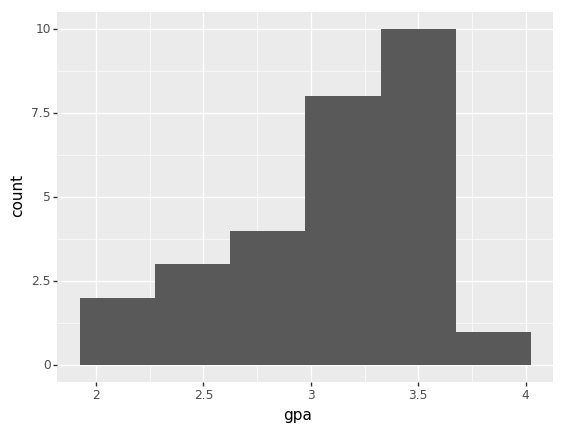

<ggplot: (131585345379)>

In [5]:
# Histograma de gpa usando ggplot
p=ggplot(aes(x='gpa'),data=datos1)
p+geom_histogram(binwidth=.35)

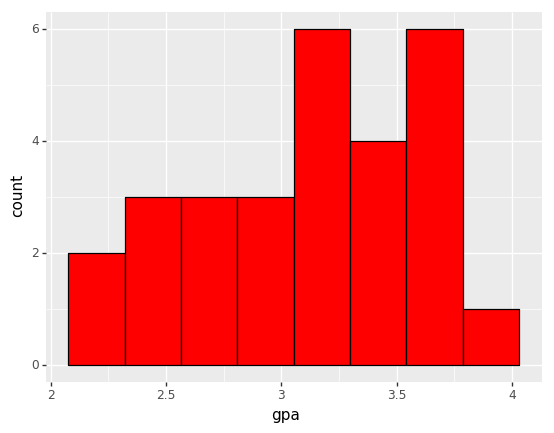

<ggplot: (-9223371905269406376)>

In [6]:
# Histograma de gpa cpn 8 intervalos usando ggplot
p=ggplot(aes(x = 'gpa'),data=datos1) 
p=p+geom_histogram(colour = "black" , fill = "red" , bins = 8)
p

### Histogram using seaborn

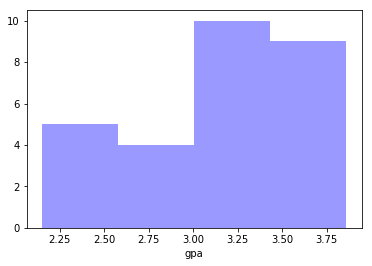

In [7]:
#Histogram de gpa usando seaborn
sns.distplot(datos1['gpa'],kde=False, color="blue")

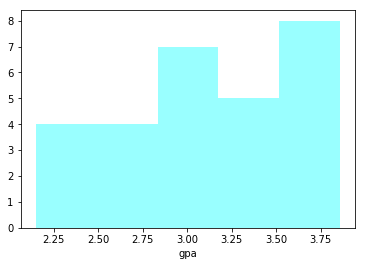

In [8]:
#otra vez el histograma en seaborn usando 5 intervalos
sns.distplot(datos1['gpa'],bins=5, kde=False, color="cyan")

### Histogram using Plotly

In [9]:
#Histograma usando plotly
import plotly 
import plotly.graph_objs as go
plotly.offline.init_notebook_mode(connected=True)

x = datos1['gpa']
data = [go.Histogram(x=x)]

plotly.offline.iplot(data, filename='histograma en plotly')

Comentario: Me da la impresion de que la libreria mas estable es seaborn.
Lo unico malo es que no hace pie charts

In [10]:
# haciendo un segundo ejemplo con el conjunto de dato mtcars que viene dentro de seaborn
mtcars = sns.load_dataset('mpg')
mtcars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


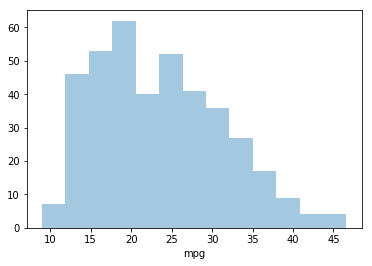

In [11]:
#Haciendo el histograma cpn seaborn
sns.distplot(mtcars['mpg'],kde=False)

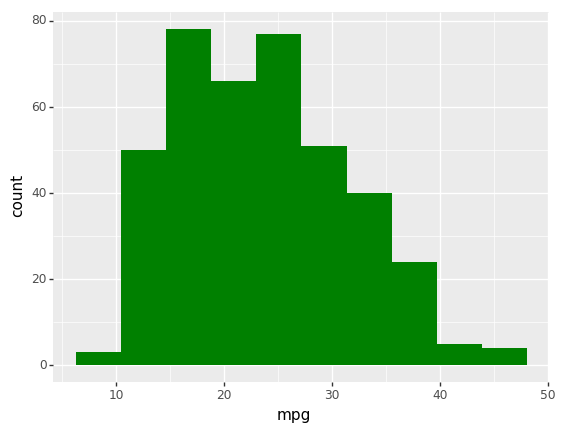

<ggplot: (131588481526)>

In [14]:
#Haciendo el histograma con ggplopt
p = ggplot(aes(x='mpg'), data=mtcars)
p+geom_histogram(fill="green",bins=10)

### Histogram using Bokeh

In [15]:
#haciendo el histograma con Bokeh
from bokeh.plotting import figure
from bokeh.io import show, output_notebook
arr_hist, edges = np.histogram(datos1['gpa'], bins = 6)
# Put the information in a dataframe
datos2 = pd.DataFrame({'gpa': arr_hist, 
                       'left': edges[:-1], 
                       'right': edges[1:]})
p = figure(plot_height = 600, plot_width = 600, 
           title = 'Histogram of gpa',
          x_axis_label = 'gpa', 
           y_axis_label = 'frecuencia absoluta')

p.quad(bottom=0, top=datos2['gpa'], 
       left=datos2['left'], right=datos2['right'], 
       fill_color='red', line_color='black')

# Show the plot
output_notebook()
show(p)

Loading BokehJS ...

### Plotting Time series

In [16]:
df2=pd.read_csv("c://esma3016/demografiaPR.csv")
df2.head()

,year,Nacimientos,Muertes
0,1980,73060,20486
1,1981,71365,21197
2,1982,69336,21522
3,1983,65742,21499
4,1984,63321,21733


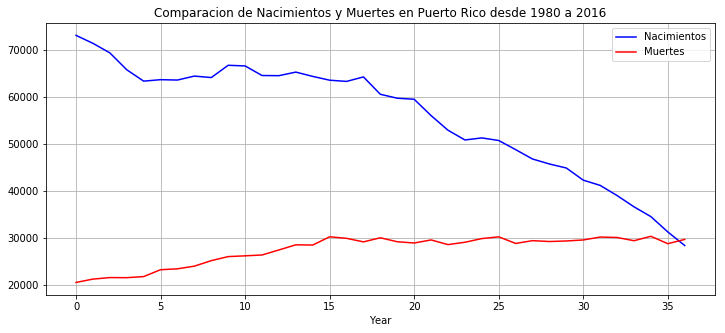

In [24]:
plt.figure(figsize=(12,5))
plt.xlabel('Year')
plt.title("Comparacion de Nacimientos y Muertes en Puerto Rico desde 1980 a 2016")
ax1 = df2.Nacimientos.plot(color='blue', grid=True, label='Nacimientos')
ax2 = df2.Muertes.plot(color='red', grid=True, label='Muertes')

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()


plt.legend()
plt.show()

### Scatterplot 3D using matplotlib

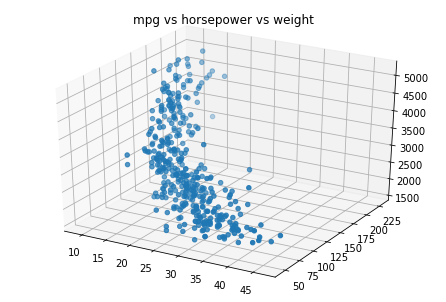

In [34]:
# Scatterplot 3D usando matplotlib
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import random

fig = pyplot.figure()
ax = Axes3D(fig)
pyplot.title("mpg vs horsepower vs weight")
ax.scatter(mtcars['mpg'], mtcars['horsepower'],mtcars['weight'])
pyplot.show()

### Scatterplot 3D using plotly

In [19]:
import plotly as py
import plotly.graph_objs as go

py.offline.init_notebook_mode(connected=True)
import numpy as np

x, y, z = np.random.multivariate_normal(np.array([0,0,0]), np.eye(3), 200).transpose()
trace1 = go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=12,
        line=dict(
            color='rgba(217, 217, 217, 0.14)',
            width=0.5
        ),
        opacity=0.8
    )
)

x2, y2, z2 = np.random.multivariate_normal(np.array([0,0,0]), np.eye(3), 200).transpose()
trace2 = go.Scatter3d(
    x=x2,
    y=y2,
    z=z2,
    mode='markers',
    marker=dict(
        color='rgb(127, 127, 127)',
        size=12,
        symbol='circle',
        line=dict(
            color='rgb(204, 204, 204)',
            width=1
        ),
        opacity=0.9
    )
)
data = [trace1, trace2]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig, filename='simple-3d-scatter')

#### Wireframe with plotly

In [23]:
import plotly as py
import plotly.graph_objs as go

py.offline.init_notebook_mode(connected=True)
import numpy as np

# Creating the data
x = np.linspace(-5, 5, 50)
y = np.linspace(-5, 5, 50)
xGrid, yGrid = np.meshgrid(y, x)
R = np.sqrt(xGrid ** 2 + yGrid ** 2)
z = np.sin(R)

# Creating the plot
lines = []
line_marker = dict(color='#0066FF', width=2)
for i, j, k in zip(xGrid, yGrid, z):
    lines.append(go.Scatter3d(x=i, y=j, z=k, mode='lines', line=line_marker))

layout = go.Layout(
    title='Wireframe Plot',
    scene=dict(
        xaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        yaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        zaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        )
    ),
    showlegend=False,
)
fig = go.Figure(data=lines, layout=layout)
py.offline.iplot(fig, filename='wireframe_plot')